# Imports

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from plotly import graph_objects as go

# Datasets

In [2]:
m = 100
X = np.linspace( -5, 5, num=100 )
y = 0.3* X**2 + X + 2 + np.random.normal( size=m )

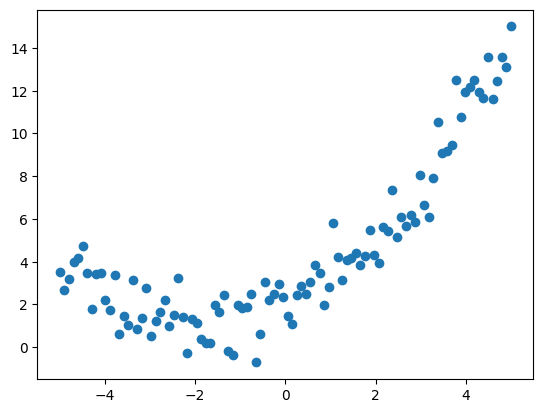

In [3]:
plt.scatter(X,y)

# Treinando o Algoritimo

In [27]:
poly = PolynomialFeatures( degree=1 )
X_poly = poly.fit_transform( X.reshape( -1,1 ) )

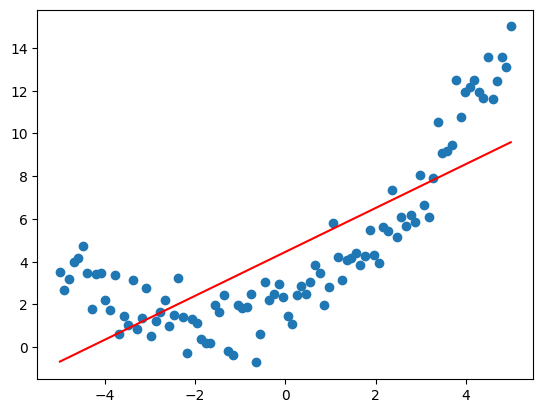

In [28]:
model = LinearRegression()
model.fit( X_poly, y)

y_pred = model.predict( X_poly )

plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

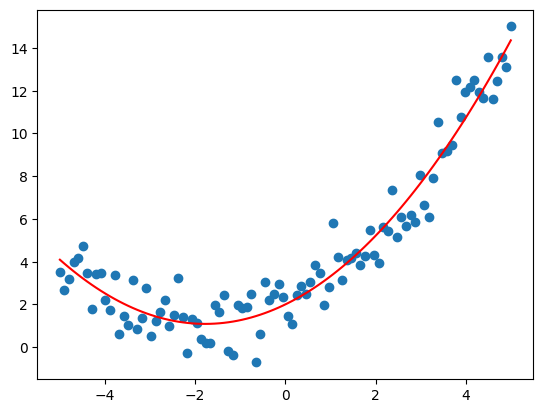

In [32]:
poly = PolynomialFeatures( degree=2 )
X_poly = poly.fit_transform( X.reshape( -1,1 ) )
model = LinearRegression()
model.fit( X_poly, y)

y_pred = model.predict( X_poly )

plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

# Graus do Polinomio

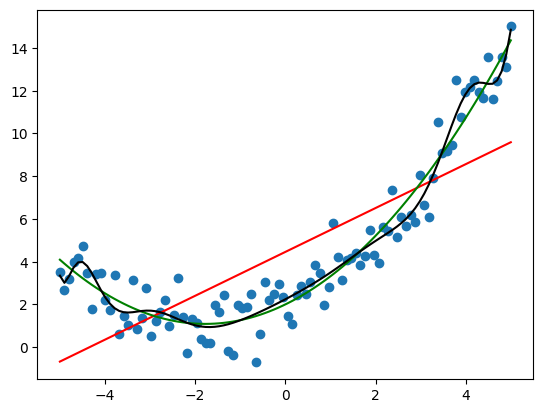

In [38]:
degrees = [1,2,15]
coef = []
intercetpts = []
preds = []

for i in degrees:
    poly = PolynomialFeatures( degree=i )
    X_poly = poly.fit_transform( X.reshape( -1,1 ) )

    model = LinearRegression()
    model.fit( X_poly, y)

    y_pred = model.predict( X_poly )
    preds.append( y_pred )


plt.scatter(X,y)
plt.plot(X,preds[0],color='red')
plt.plot(X,preds[1],color='green')
plt.plot(X,preds[2],color='black')

# Decision Boundaries

In [48]:
np.random.seed(0)
n_samples = 100

X = np.random.rand( n_samples, 2 ) * 10

coef = np.array([4,-3, 2])

y_true = np.dot(np.column_stack( [
                X[:,0]**2,
                X[:,1],
                np.ones(n_samples)],
                ),coef)
y_noise = np.random.normal( 0, 2,n_samples )

y = y_true+y_noise

In [66]:
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)

model = LinearRegression()

model.fit(X_poly,y)

LinearRegression()

In [67]:
x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1

x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min,x1_max,0.1),np.arange(x2_min,x2_max,0.1))

X_mesh = np.column_stack( [x1_mesh.ravel(),x2_mesh.ravel() ] )

X_mesh_poly = poly.transform( X_mesh )
y_mesh = model.predict( X_mesh_poly )
y_mesh = y_mesh.reshape( x1_mesh.shape )

In [68]:
# Criando o gráfico 3D
fig = go.Figure(data=[
go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', marker=dict(color='blue', opacity=0.6), name='Dados'),
go.Surface(x=x1_mesh, y=x2_mesh, z=y_mesh, colorscale='amp', opacity=0.6, name='Superfície de Decisão')
])
# Configurando o layout do gráfico
fig.update_layout(scene=dict(
xaxis_title='X1',
yaxis_title='X2',
zaxis_title='Y',
aspectmode='auto'
))
# Exibindo o gráfico
fig.show()